# SOCI 415 Network Analysis

prAxIs UBC Team <br> *Alex Ronczewski, Irene Berezin*  
2025-08-24

This notebook introduces key concepts in network analysis pertaining to
sociology and provides a hands-on tutorial to using the NetworkX Python
library.

## 1. What is Network analysis?

**Network Analysis** is a set of techniques used to study the structure
and dynamics of networks. **Networks** are collections of
objects/locations/entities (called *nodes*) connected by relationships
(called *edges*). Network analysis has applications in many fields,
including sociology, biology, economics, computer science, and more.

<img src="media/networks.png" alt="Network" style="width:80%">

Regional networks of ceramic similarity across time in the greater
Arizona/New Mexico area of the US (From Mills et al. 2013, Fig. 2)

**Network science in Sociology** Network analysis in sociology is the
systematic study of social structure through the mapping and measurement
of relationships among individuals, groups, or organizations. It is not
a discipline on its own, but rather a methodological and theoretical
approach within sociology that helps conceptualize, describe, and model
society as interconnected sets of actors linked by specific
relationships. Network analysis in sociology is a core tool for
understanding how relationships and social structures impact individuals
and groups,

### 1.1 Key terms

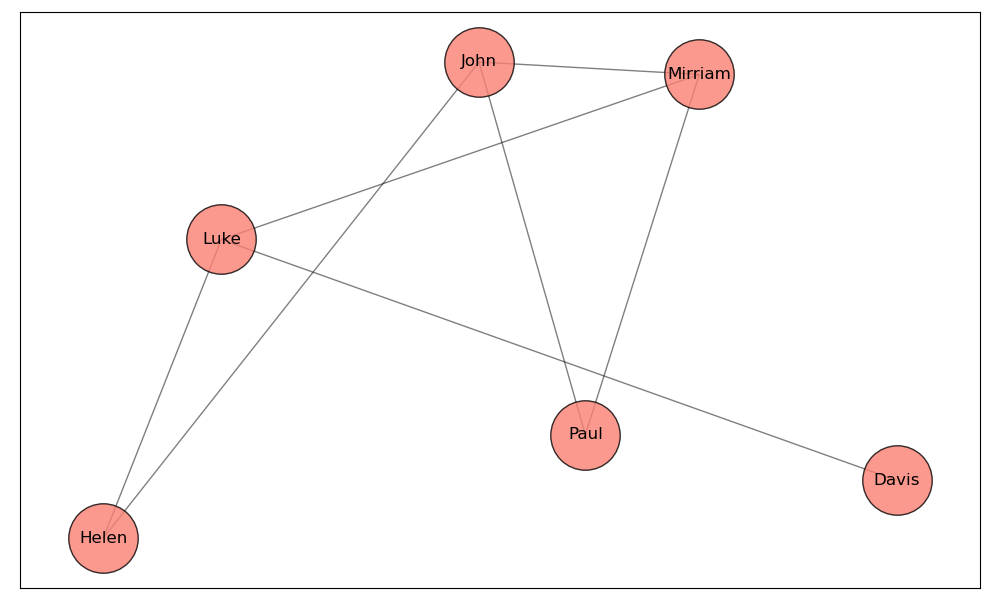

**Node:** A node is a representation of an individual entity or actor in
a network. In different contexts, nodes can be people, organizations,
cities, or any other unit of analysis.

**Edge:** An edge represents the relationship or connection between two
nodes. Edges can be directed (having a specific direction from one node
to another) or undirected (no direction, implying a mutual
relationship).

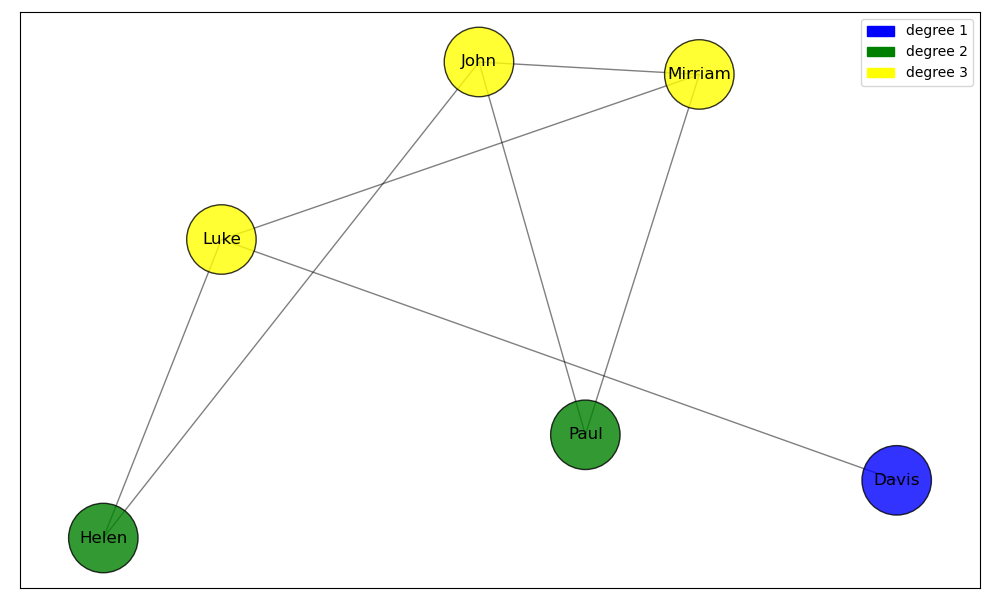

**Degree:** The degree of a node is the number of edges connected to it.
In directed networks, this can be further divided into in-degree (number
of incoming edges) and out-degree (number of outgoing edges).

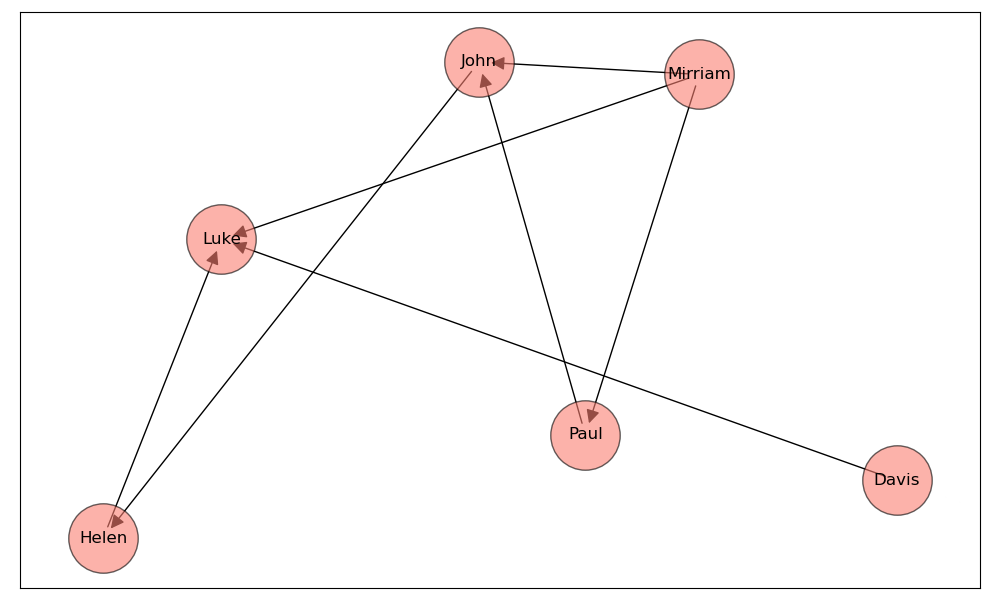

The network above is an example of a **Undirected graph**, a graph with
no direction. This means that if there is a connection between node A
and node B, it is bidirectional: A is connected to B, and B is connected
to A.

The example to the left is a **directed graph**: the edges between nodes
have a specific direction. This means that if there is an edge from node
A to node B, it does not imply there is an edge from B to A unless
explicitly stated.

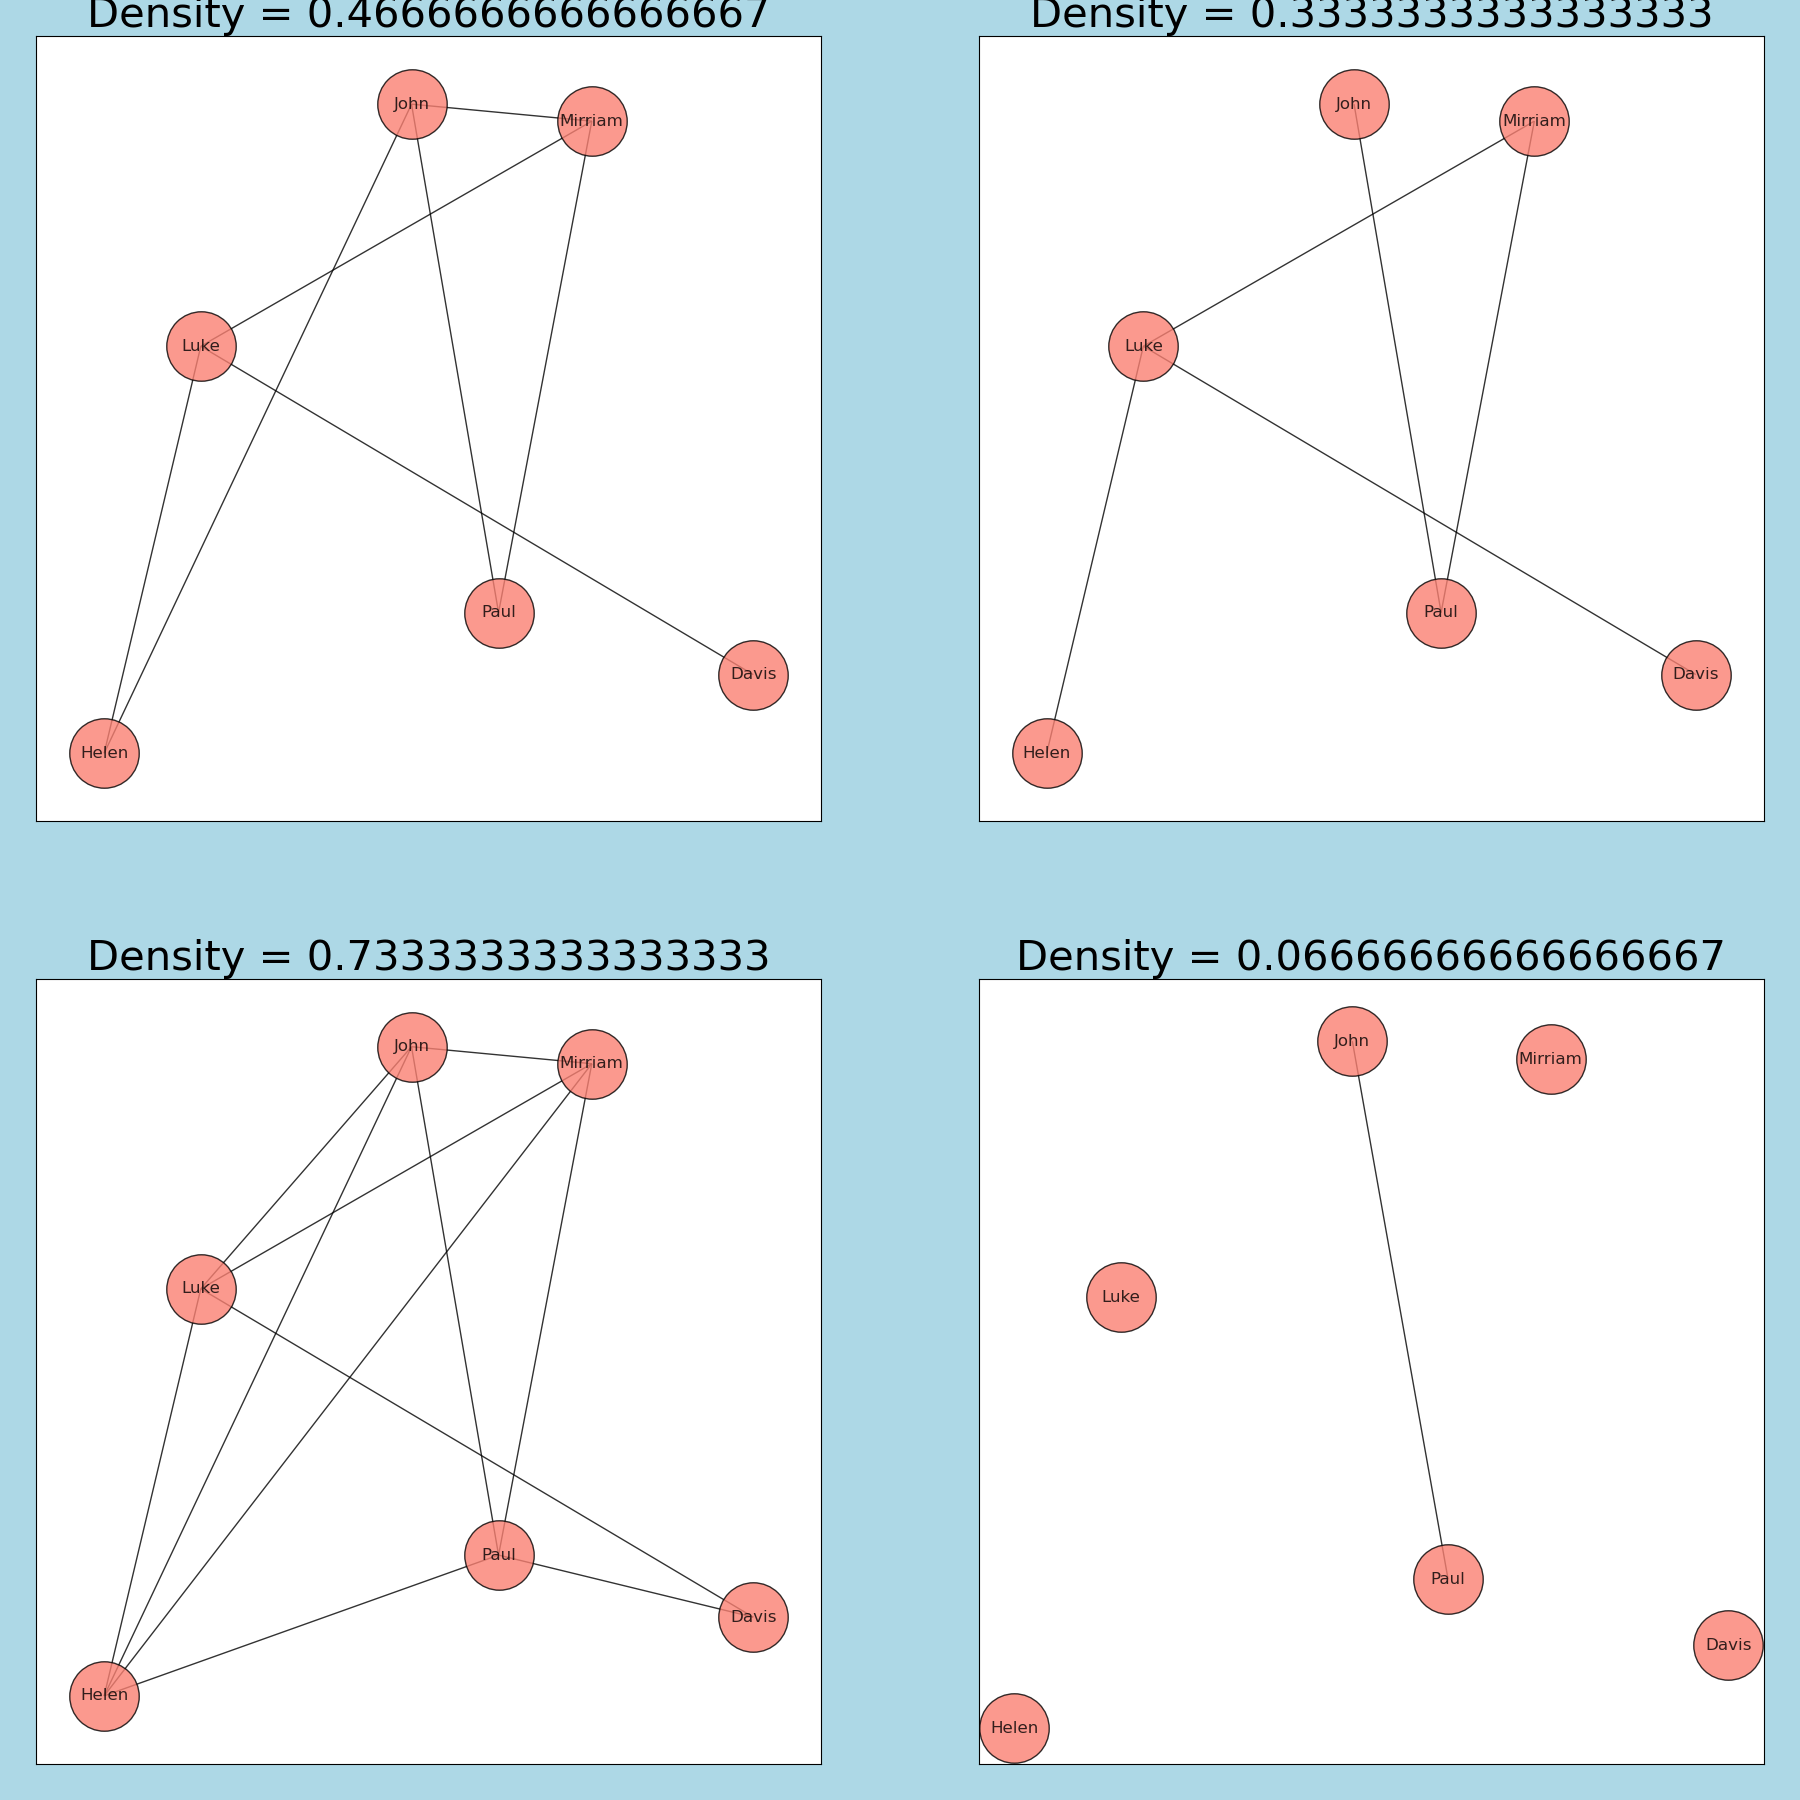

**Density:** Density is a measure that indicates how closely connected
the nodes in a network are. Specifically, it refers to the ratio of the
number of actual edges in the network to the maximum possible number of
edges between nodes.

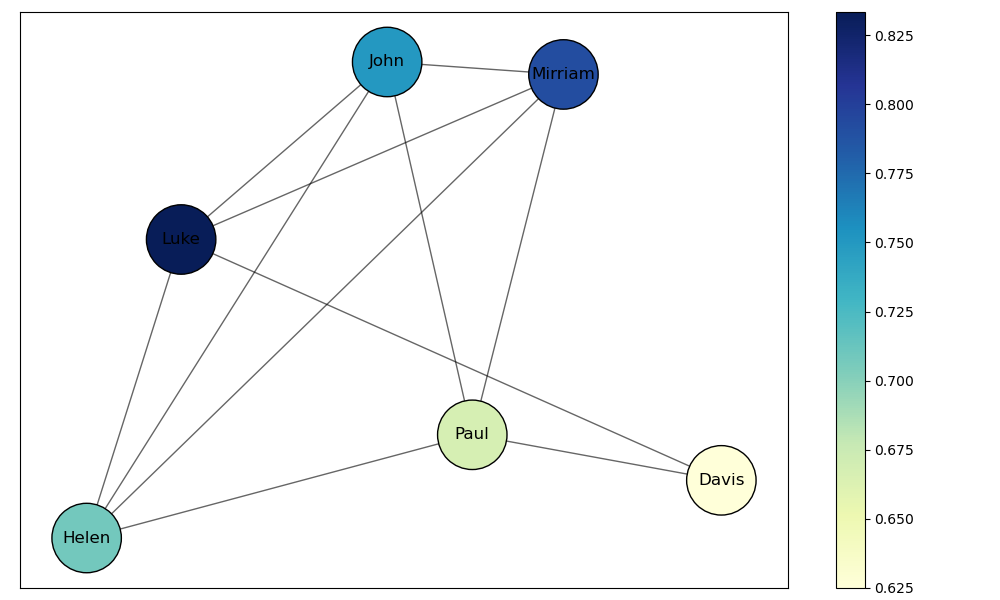

**Centrality:** Centrality measures the importance, influence, or
prominence of nodes (entities) within a network. The centrality of a
node tells us how “important” a node is to the aggregate network. There
are many different kinds of centrality, but the four most well-known
ones are degree, betweenness, closeness, and eigenvector centrality.

### 1.2 NetworkX

`NetworkX` is a Python library that is used for the creation,
manipulation, and visualization of complex networks. It provides tools
to work with both undirected and directed networks, perform
network-related calculations, and visualize the results.

A library in Python is a collection of code that makes everyday tasks
more efficient. In this case working with networks becomes much simpler
when using NetworkX.

If you want to read the NetworkX documentation you can follow the <a
href="https://networkx.org/documentation/stable/reference/introduction.html"
target="_blank">NetworkX documentation link</a>. This link shows what
kind of commands exist within the NetworkX library.

#### 1.2.1 Importing NetworkX

We can import NetworkX using the `import` command. At the same time,
we’ll also import the `matplotlib.pyplot` library, for plotting graphs.
Additionally, we’ll import `pandas` for basic data wrangling, and
`numpy` for math. The `as` command allows us to use `networkx` commands
without needing to type out `networkx` each time. Along with some other
libraries.

In [1]:
import matplotlib.pyplot as plt #allows us to call the matplotlib.pyplot library as 'plt'
import matplotlib.patches as mpatches #imports mpatches matplotlib subpackage 
import networkx as nx #allows us to call the networkx library as 'nx'
import pandas as pd #allows us to call the pandas library as 'pd'
import numpy as np
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import community as community_louvain
import random

#### 1.2.2 Creating simple networks using NetworkX

We’ll start by creating a simple graph:

Below in the code we choose our nodes and edges between them.

In [2]:
G = nx.Graph() #creates an empty network graph

nodes = (1, 2, 3, 4, 5, 6) #our nodes, labeled 1,2,3,4,5,6.
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
        #the connections between our nodes are stored in an array, containing pairs of numbers called tuples.
G.add_edges_from(edges) #the `add_edges_from()` command adds edges to the network
G.add_nodes_from(nodes) #the `add_nodes_from()` command adds nodes to the network

nx.draw(G, with_labels = True) #renders the graph in the notebook
        #the `with_labels = True` argument specifies that we want labels on the nodes.

Let’s create a directed graph using `nx.DiGraph()`. We’ll also set our
node positions using a seed: this will ensure that each time the nodes
are rendered they hold the same position on the graph. You can set the
seed to any number.

In [3]:
G = nx.DiGraph() #creates an empty directed graph object
nodes = (1, 2, 3, 4, 5, 6) #our nodes
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)] #our tuples stored in an array which represent our nodes
G.add_edges_from(edges) #connects edges to nodes
G.add_nodes_from(nodes) #connects edges to nodes

position = nx.spring_layout(G, seed=100)

#nx.draw plots our network
nx.draw(G, pos = position, with_labels = True) # `pos` argument assigns a position to each node

### 1.3 Creating Random Graphs

Instead of creating a graph with predetermined positions of nodes and
edges we can also generate a random graph with a set amount of nodes and
edges. Below you can change the amount of nodes and edges by changing
`n` and `d` which correspond to the number of nodes and the degree
(number of edges) that each node has. Creating a random graph could be
more helpful for testing or when you want to try something and don’t
wish to spend time plotting a real network and determining paths for all
edges and nodes.

The command we will use is the `nx.random_regular_graph` command. Which
generates a random regular graph.

In [4]:
# Set a seed for reproducibility so that everytime the code runs we get the same random graph
random.seed(42)

# Parameters
n = 20  # number of nodes
d = 3   # degree of each node

# Generate the random regular graph
rr_graph = nx.random_regular_graph(d, n)

# Visualize the graph, you can change the size, color, font and node size. 
plt.figure(figsize=(8, 6)) 
nx.draw(rr_graph, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
plt.title("Random Regular Graph")
plt.show()

# Print some basic information about the graph
print(f"Number of nodes: {rr_graph.number_of_nodes()}")
print(f"Number of edges: {rr_graph.number_of_edges()}")
print(f"Degree of each node: {d}")

## 2. Degrees, Density and Weights

### 2.1 Degrees

The **degree** of a node is the number of edges that are connected to a
node.

We can see the degree of each node by running `dict(G.degree())`. This
create a dictionary of key-value pairs for our network, where each key
is the name of the node and the value is it’s respective degree.

In [5]:
degrees = dict(G.degree())

If we want to see the degree of node $n$, we can do so by running
`print(degrees[n])`. For instance:

In [6]:
print(degrees[1])

Let’s color the nodes of our graph based on their degree. We’ll create a
function called `get_node_colors` which takes in the degree dictionary
of each node and returns a color. We’ll then create a for-loop that
iterates over each nodes in the list of nodes, gets the color of each
node using the `get_node_colors` function we defined earlier, and
appends it to an empty list called `color_map`.

In [7]:
degrees = dict(G.degree())
nodes = list(G.nodes())

def get_node_colors(degree):
    if degree in [1, 2]:
        return 'blue'
    elif degree in [3, 4]:
        return 'green'
    elif degree in [5, 6]:
        return 'yellow'
    else:
        return 'red' 

color_map = [] #`color_map` is an empty list

for node in nodes:
  color = get_node_colors(degrees[node]) # get color of current node using node_colors according to degree of node
  color_map.append(color) # appends color of each node to color_map for each node in nodes

print(degrees)
print(nodes)
print(color_map)

The $n$-th entry in `color_map` corresponds to the $n$-th node in
`nodes`. For instance, `color_map[0]` returns the color of the first
node (1).

In [8]:
color_map[0]

We can now color the nodes of our graph, using the color map we defined
above. The `node_color` argument takes in an array or list of colors
that it uses to color each node.

In [9]:
G = nx.DiGraph() # creates an empty directed graph object
nodes = (1, 2, 3, 4, 5, 6) 
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
G.add_edges_from(edges) 
G.add_nodes_from(nodes) 

position = nx.spring_layout(G, seed=100)

nx.draw(G, pos = position, node_color=color_map, with_labels=True) 
    # node_color argument colors the nodes based on a given list or array of colors, 
    # with the first color corresponding to the first node, second to the second node, etc.

Let’s also add a legend to our graph, which gives information about the
meaning of each color. We’ll do this using the `mpatches` subpackage we
imported earlier.

In [10]:
blue_patch = mpatches.Patch(color='blue', label='1-2 edges') 
green_patch = mpatches.Patch(color='green', label='3-4 edges')
yellow_patch = mpatches.Patch(color='yellow', label='5-6 edges')
plt.legend(handles=[blue_patch, green_patch, yellow_patch]) #adds legend to the plot

nx.draw(G, pos = position, node_color=color_map, with_labels=True)

### 2.2 Density

Density refers to the proportion of actual edges in a network compared
to the total possible connections. It indicates how interconnected the
nodes in a network are, with a higher density suggesting a more
connected network. Density is defined from \[0,1\], meaning a network
with a density of 0.95 is very interconncected. Note that self-loops
(edges from and to the same node) are counted in the total number of
edges but not in the maximum number of edges so graphs can have a
density greater than 1.

We can calculate the density of our graph:

In [11]:
nx.density(G)

### 2.3 Weights

Often times, you may end up working with *weighted* graphs: for
instance, these weights could correspond to popularity of roads in road
networks, or the size of pipes in a sewage network.

We’ll standardize our weights to be between 1 and 2 (as otherwise the
results are messy). We’ll do this using a for-loop, like we did with the
degrees.

In [12]:
G_weights = nx.DiGraph() #creating a new graph object called G_weights
nodes = [1, 2, 3, 4, 5, 6]
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
weights = [100, 50, 75, 50, 60, 100, 100, 75, 40, 50, 50, 100, 100] #add list of weights
G_weights.add_edges_from(edges) 
G_weights.add_nodes_from(nodes) 

adjusted_weights = []
for weight in weights:
    adjusted_weight = 1+ (max(weights)-weight)/(max(weights)-min(weights)) #standardizes weights to be between 1 and 2
    adjusted_weights.append(adjusted_weight)

position = nx.spring_layout(G, seed=100)

print(adjusted_weights)
nx.draw(G_weights, pos = position, width = adjusted_weights, with_labels = True) 
    # width argument take in a list or array of numbers corresponding to weights

This is great, but the results aren’t very clear. Let’s add a color
gradient to the edges to represent different weights.

In [13]:
norm = plt.Normalize(min(weights), max(weights), clip=False) 
    #`plot.normalizes` normalizes the weights such that they are evenly distributed across the gradient spectrum
edge_colors = plt.cm.Greys(norm(weights)) 
    # norm(weights) normalizes the weights 
    # plot.cm.greys() assigns the weights to color values
    # edge_colors is a multidimensional array of RGBA color values corresponding to each edge

fig, ax = plt.subplots() #explicitly specifying figure and axes in order to create a color bar

nx.draw(G_weights, pos=position, edge_color=edge_colors, width=adjusted_weights, with_labels=True, ax=ax) 
    #ax = ax argument needed for color bar

# Adding color bar
sm = plt.cm.ScalarMappable(cmap="Greys", norm=norm) # creates a scalarmappable object which acts 
                                                    # as a bridge between the numerical weight values and color map
plt.colorbar(sm, ax=ax) #plotting color bar

## 3. Adjacency matrices

An **Adjacency matrix** is a method of representing graphs in matrix
form. In an adjacency matrix, the rows and columns correspond to the
vertices (or nodes) of the graph. The entries of the matrix indicate
whether pairs of vertices are adjacent or not in the graph. Normally, a
value of 1 is assigned to entries where an edge is present, and 0 is
assigned to entries where an edge is not. For a weighed graph, the
weight of the edge is represented as a numerical value for entries where
an edge is present.

We can convert our simple graph to an adjacency matrix:

In [14]:
nx.to_pandas_adjacency(G)

If we want to use our weighted graph, we can use the following code:

In [15]:
# len(edges) returns the total number of entries in the list of edges.
# range(len(edges)): This generates a sequence of numbers from 0 to n-1 where n is len(edges), 
    #so the for-loop will run n times with i taking each value in that range, one at a time.

for i in range(len(edges)):
    edge = edges[i] # retrieves the edge at position i in the list of edges
    weight = weights[i] # retrieves the weight at position i in the list of weights
    G_weights.add_edge(edge[0], edge[1], weight=weight) # adds an edge with a weight to the graph 
    
nx.to_pandas_adjacency(G_weights, nodelist=nodes, weight='weight') #converts to pandas adjacency matrix with the weights in place

We can visualize our matrix using the code below. Note that instead of
using `nx.to_pandas_adjacency` we use `nx.to_numpy_array`: this allows
us to store the matrix in the form of an array.

In [16]:
adj_matrix = nx.to_numpy_array(G_weights, nodelist=nodes, weight='weight')


plt.figure(figsize=(8, 8)) #displays data as an image on a 2d raster; in our case, a numpy array

plt.imshow(adj_matrix, cmap='gray_r')

for i in range(adj_matrix.shape[0]): #loops through each row of the matrix
    for j in range(adj_matrix.shape[1]): #for each row, loops through each column of the matrix
        plt.text(j, i, int(adj_matrix[i, j]),
                 ha='center', va='center', color='red', size=30) #prints the value at that position in the matrix on the graph

plt.title('Adjacency Matrix Visualization')
plt.xlabel('Node Index')
plt.ylabel('Node Index')

## 4.0 Measures of Centrality

**Centrality** is defined as the set of metrics used to determine the
importance or influence of a particular node within a network. It helps
to identify which nodes hold strategic significance in terms of
connectivity, information flow, or influence over other nodes. Various
centrality metrics, such as degree, betweenness, and eigenvector
centrality, provide different perspectives on the role each node plays
within the network’s overall structure.

### 4.1 Network Distance and Eccentricity

Before talking about centrality, we first need to talk a bit about
*distance*. **Distance**, also known as **Geodesic distance**, is
defined as the number of edges traversed by the shortest path between
two nodes.

-   The distance between a node and itself is 0.
-   The distance between a node and a node for which no shortest path
    exists (such as a node that is disconnected from other nodes) is
    $\infty$.
-   The distance between a node and it’s neighbor is 1.

A node’s **eccentricity** is the maximum distance from said node to all
other nodes in the graph. For instance, in the following network, the
eccentricity of node $A$ is 2, but the eccentricity of node $B$ is 1.

In [17]:
nodes = ("A","B", "C")
edges = [("A","B"), ("B", "C")]

G_example = nx.Graph()
G_example.add_edges_from(edges)
G_example.add_nodes_from(nodes)

color_map = ["salmon", "lightblue", "salmon"]


red_patch = mpatches.Patch(color='salmon', label='eccentricity = 1') 
blue_patch = mpatches.Patch(color='lightblue', label='eccentricity = 2') 
plt.legend(handles=[blue_patch, red_patch])

nx.draw(G_example, node_color=color_map, with_labels=True)

If we color the nodes of our random graph by eccentricity, we can see:

In [18]:
#Create random graph
random.seed(415) #Course code
n = 20 
d = 3
rr_graph = nx.random_regular_graph(d, n)

# Compute eccentricity
ecc = nx.eccentricity(rr_graph)
unique_ecc = sorted(set(ecc.values()))

# Choose a color for each unique eccentricity using matplotlib
colors = plt.get_cmap('tab10', len(unique_ecc))
ecc_to_color = {e: colors(i) for i, e in enumerate(unique_ecc)}
color_map = [ecc_to_color[ecc[node]] for node in rr_graph.nodes()]

# Create a legend
patches = [mpatches.Patch(color=colors(i), label=f"eccentricity = {e}") for i, e in enumerate(unique_ecc)]

plt.figure(figsize=(8, 6))
nx.draw(rr_graph, node_color=color_map, with_labels=True, node_size=500, font_size=10, font_weight='bold')
plt.legend(handles=patches, bbox_to_anchor=(1, 1))
plt.title("Random Regular Graph with Eccentricity Coloring")
plt.tight_layout()
plt.show()

# Print summary
print(f"Number of nodes: {rr_graph.number_of_nodes()}")
print(f"Number of edges: {rr_graph.number_of_edges()}")
print(f"Eccentricity distribution: {ecc}")

We can see that the nodes in the furthest corners have an eccentricity
of 6 and more central nodes have a lower eccentricity.

### 4.2 Degree Centrality

Degree centrality is simple: Recall that the **degree** of a node is the
number of nodes directly connected to it. In degree centrality, the more
adjacent nodes, the more important the network is considered to be.
Degree centrality is used primarily in social networks, where nodes with
higher degrees are commonly major channels of information. A high degree
means a node has many direct ties with other nodes, and has better
access to resources within the network.

Note that the NetworkX `nx.degree_centrality()` function normalizes each
node’s degree by dividing by the maximum possible degree in the network.
Therefore for graphs without self-loops the degree centrality is always
$\leq 1$. For educational purposes, we un-normalize the degree values,
but this is not common practice.

We can not use the same random graph technique as each node will have a
degree equal to 3, instead we will use the first graph from this
notebook.

We can calculate the degree centrality of all our nodes in our network:

In [19]:
# Define the graph
nodes = (1, 2, 3, 4, 5, 6)
edges = [
    (1, 2), (2, 3), (3, 1), (1, 5), (3, 5),
    (4, 5), (4, 6), (6, 1), (6, 3), (6, 4),
    (4, 3), (5, 5), (3, 5)
]
G = nx.Graph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)

# Get degree for each node
degree_dict = dict(G.degree())
degrees = list(degree_dict.values())
unique_degrees = sorted(set(degrees))

# Assign a unique color per degree
colors = plt.get_cmap('viridis', len(unique_degrees))
degree_to_color = {deg: colors(i) for i, deg in enumerate(unique_degrees)}
color_map = [degree_to_color[degree_dict[n]] for n in G.nodes()]

# Create legend for each degree
patches = [mpatches.Patch(color=colors(i), label=f"degree = {deg}") for i, deg in enumerate(unique_degrees)]

plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color=color_map, node_size=800, edge_color='gray', font_weight='bold')
plt.legend(handles=patches, bbox_to_anchor=(1, 1))
plt.title("Degree Centrality Graph")
plt.tight_layout()
plt.show()

### 4.3 Closeness Centrality

**Closeness centrality** is a measure of how close a node is to all
other nodes in the network. It can be computed as the “sum of the
geodesic distances of a node to all other nodes in the network”. A node
is *important* if it is *close to all other nodes in the network*. One
flaw of closeness centrality is that while it is a useful indicator of
node importance in small networks, it produces little variation in large
networks with many edges.

In [20]:
# Define the graph
nodes = (1, 2, 3, 4, 5, 6)
edges = [(1, 2), (2, 3), (3, 1), (1, 5), (3, 5),(4, 5), (4, 6), (6, 1), (6, 3), (6, 4),(4, 3), (5, 5), (3, 5)]
G = nx.Graph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)

# Calculate closeness centrality
centrality = nx.closeness_centrality(G)

# Normalize centrality values for color mapping (so 0 = min, 1 = max)
centralities = np.array(list(centrality.values()))
norm_centrality = (centralities - centralities.min()) / (centralities.max() - centralities.min() + 1e-9)

# Map normalized centrality to colormap
cmap = plt.cm.plasma
color_map = [cmap(val) for val in norm_centrality]

plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color=color_map, node_size=800, edge_color='gray', font_weight='bold')
plt.title("Graph Colored by Closeness Centrality")
plt.tight_layout()
plt.show()

# Print node centrality table
print("Node\tCloseness Centrality")
for node in G.nodes():
    print(f"{node}\t{centrality[node]:.4f}")

### 4.4 Betweenness Centrality

**Betweenness Centrality** is a measure of the importance of a node
based on how well it serves as a **bridge** between nodes in a network.
The mathematical representation of the betweeness centrality of a node
is the number of times each node has to pass through that node to reach
every other node in a network. Nodes with high betweenness thus serve as
“bridges” within a network.

Consider the graph below:

In [21]:
#Define our network
G_betweenness_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_betweenness_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_betweenness_example, seed=1000)

#Draw our graph
nx.draw(G_betweenness_example,pos=pos, with_labels=True, edgecolors="black", node_color="bisque", node_size=800)

Node $4$ serves as a *bridge* between nodes 5 and 6 to the rest of the
nodes in the network. For a path to be drawn between nodes 6 or 5 to
nodes 0,1,2,3, the path *must* go through node 4. Let’s calculate the
betweenness centrality of this network, and label nodes by centrality:

In [22]:
#Define our network
G_betweenness_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_betweenness_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_betweenness_example, seed=1000)

#Find the centrality values for our nodes
centrality = nx.betweenness_centrality(G_betweenness_example, normalized=False)
centrality_values = np.array(list(centrality.values()))
cmap="BuPu"

#Put labels on our network
labels = {}
for node in G_betweenness_example.nodes():
    labels[node] = centrality_values[node]


#Draw our graph using `nx.draw`
nx.draw(G_betweenness_example,pos=pos, node_color=centrality_values, edgecolors="black", cmap=cmap, node_size=800)
nx.draw_networkx_labels(G_betweenness_example, pos, labels=labels, font_color="orangered")

We can see that node 4 does indeed have the highest betweenness
centrality. The values of 0 for nodes 0, 1, 2, 3 and 6 indicate that
each node can reach every other node without passing through those
nodes. The value of 5.0 for node 5 indicates that five nodes *must* pass
through node 5 in order to reach another node.

### 4.5 Eigenvector centrality

**Eigenvector centrality** is a measure of the influence of a node in a
network by considering not just how many connections it has (as we did
with degree centrality), but also the importance of those connections: A
node with high eigenvector centrality is connected to many nodes that
themselves have high centrality, making it more influential in spreading
information or resources. Unlike simpler measures like degree
centrality, which only counts connections, eigenvector centrality looks
at the overall structure of the network. It helps identify key players
in a network who might not have the most connections but are
well-connected to other important nodes.

In [23]:
# Create a larger network 
G = nx.barabasi_albert_graph(n=20, m=2, seed=42)  # 20 nodes and each connects to 2

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Normalize values for coloring
centrality_values = np.array(list(centrality.values()))
norm_centrality = (centrality_values - centrality_values.min()) / (centrality_values.max() - centrality_values.min() + 1e-9)
cmap = plt.cm.plasma
color_map = [cmap(val) for val in norm_centrality]

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos=pos, with_labels=True, node_color=color_map,
        node_size=800, font_weight='bold', edge_color='gray')
plt.title('Large Graph Colored by Eigenvector Centrality')
plt.tight_layout()
plt.show()

# Print node eigenvector centrality table
print("Node\tEigenvector Centrality")
for node in G.nodes():
    print(f"{node}\t{centrality[node]:.4f}")